In [ ]:
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
X = joblib.load('/content/drive/My Drive/Colab Notebooks/Modelfeature/X.joblib')
y = joblib.load('/content/drive/My Drive/Colab Notebooks/Modelfeature/y.joblib')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

x_traincnn.shape, x_testcnn.shape

Mounted at /content/drive


((5681, 40, 1), (2799, 40, 1))

In [ ]:
model = Sequential()

model.add(Conv1D(64, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=200, validation_data=(x_testcnn, y_test))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 64)            384       
_________________________________________________________________
activation (Activation)      (None, 40, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 40, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 128)           41088     
_________________________________________________________________
activation_1 (Activation)    (None, 10, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 128)           0

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.98      0.92      0.95       322
           1       0.77      0.92      0.84       138
           2       0.93      0.93      0.93       377
           3       0.93      0.87      0.90       350
           4       0.98      0.93      0.96       413
           5       0.93      0.96      0.94       405
           6       0.91      0.97      0.94       391
           7       0.94      0.94      0.94       403

    accuracy                           0.93      2799
   macro avg       0.92      0.93      0.92      2799
weighted avg       0.93      0.93      0.93      2799

[[295  12   1   4   0   4   4   2]
 [  1 127   6   2   0   0   2   0]
 [  0   2 352   2   2  10   3   6]
 [  0  22   2 304   0   6   8   8]
 [  0   0   3   3 386   0  14   7]
 [  0   1   7   9   0 387   1   0]
 [  2   0   0   0   4   5 378   2]
 [  3   2   6   2   2   4   5 379]]


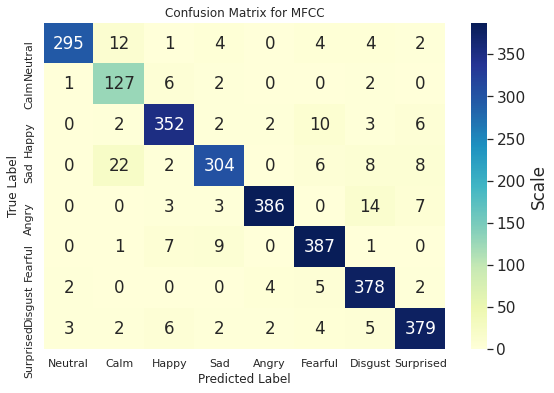

In [ ]:
from sklearn.metrics import confusion_matrix
predictions = model.predict_classes(x_testcnn)

report = classification_report(y_test, predictions)

print(report)

import seaborn
import matplotlib.pyplot as plt
 
def plot_confusion_matrix(data, labels):

    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title("Confusion Matrix for MFCC")
 
    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(conf, annot=True, cmap="YlGnBu",fmt="g", cbar_kws={'label': 'Scale'})
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")
 
    plt.show()

conf = confusion_matrix(y_test,predictions)
print(conf)
 
# define labels
labels = ['Neutral', 'Calm', 'Happy', 'Sad', 'Angry', 'Fearful', 'Disgust', 'Surprised']
 
# create confusion matrix
plot_confusion_matrix(conf, labels)
plt.show()

In [ ]:
import os
model_name = 'Emotion_Voice_Detection_ModelMFCC.h5'

# Save model and weights
model_path = os.path.join('/content/drive/My Drive/Colab Notebooks/Modelfeature', model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/Colab Notebooks/Modelfeature/Emotion_Voice_Detection_ModelMFCC.h5 


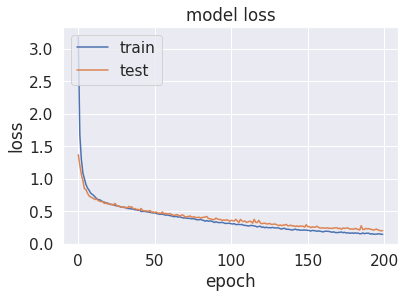

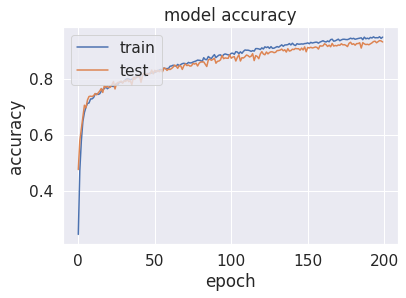

In [ ]:
plt.figure(1)
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.figure(2)
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()